# Tensorflow basis

## Example 1

Eager calculations in tensorflow

Add two variables a = 1 and b = 10


In [1]:
# Example
import numpy as np
import tensorflow as tf

print(tf.executing_eagerly())

a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c.numpy())

True
11


## Example 2


In [2]:
# Example
import numpy as np
import tensorflow as tf

@tf.function 
def add(a,b): 
  return a + b

def sub(a,b):
  return a - b  

a = tf.Variable(5) 
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x.numpy())


10


# Task 1

Calculate by Tensorflow folowing expression $y = a * b + c$.

a,b, and c are 2x2 matrixes. Numbers in matrixes depends on your choice.
Multiplication is elementwise.


In [13]:
a=tf.constant([[1,2],[10,10]],dtype=tf.float32)
b=tf.constant([[3,4],[10,10]],dtype=tf.float32)
c=tf.constant([[5,6],[10,10]],dtype=tf.float32)

@tf.function
def applyEq(a,b,c):
    return a*b+c

print(applyEq(a,b,c))

tf.Tensor(
[[  8.  14.]
 [110. 110.]], shape=(2, 2), dtype=float32)


# Example 3

Draw a graf of the function $y=f(x)=x^2$ and its derivatice $y'=f'(x). Use Tensoflow for derivative calculation.

[9. 4. 1. 0. 1. 4. 9.]
[-6. -4. -2.  0.  2.  4.  6.]


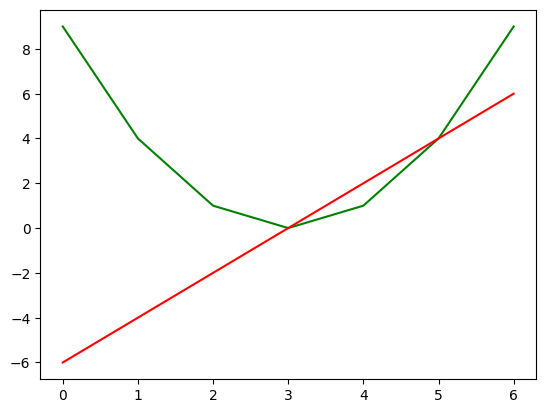

In [4]:
# Example
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def f(x):
  y = x*x
  return y

@tf.function
def dfdx(x):
  y = f(x)
  return tf.gradients(y, x)[0]

x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])
print(f(x).numpy())
print(dfdx(x).numpy())

plt.plot(f(x),'g')
plt.plot(dfdx(x),'r')       

# Task 2

Draw a graf of the function $y=\sigma(x)=\frac{1}{1+e^{-x}}$ and its derivative $y'=s'(x)$. Use Tensoflow for derivative calculation.

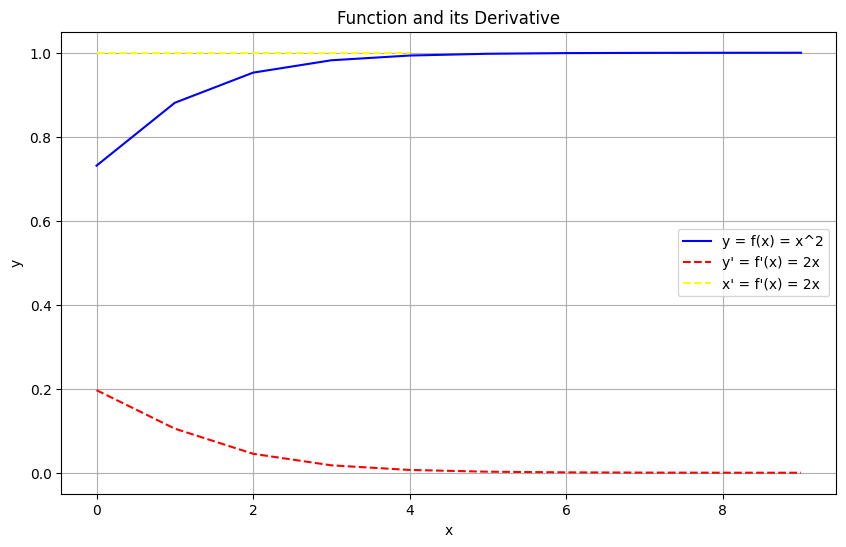

In [43]:
@tf.function
def sgm(x):
    y = 1/(1+tf.exp(-x))
    return y

@tf.function
def dy_sgm(x):
    y=sgm(x)
    return tf.gradients(y,x)[0]

@tf.function
def dx_sgm(x1):
    with tf.GradientTape() as tape:
        tape.watch(x1)
        z=sgm(x1)
    return tape.gradient(z,z)

x=tf.Variable(np.linspace(1,10,10),dtype=tf.float32)
x1=tf.constant([1,2,3,4,5],dtype=tf.float32)

# Plot the function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(sgm(x), label="y = f(x) = x^2", color="blue")
plt.plot(dy_sgm(x), label="y' = f'(x) = 2x", color="red", linestyle="--")
plt.plot(dx_sgm(x1), label="x' = f'(x) = 2x", color="yellow", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function and its Derivative")
plt.legend()
plt.grid()
plt.show()

# Task 3

Calculate the gradient of function $y=g(x,y)=e^{-\frac{x^2+y^2}{2\sigma^2}}$ for $\sigma^2 = 0.5\;\mbox{and}\;x = 1\;\mbox{and}\;y = 1$

In [78]:
@tf.function
def g(x,y,sigma):
    y=tf.exp(-(x**2 + y**2)/(2*sigma**2))
    return y

@tf.function
def d_g(x,y,sigma):
    z=g(x,y,sigma)
    return tf.gradients(z,[x,y])[0],tf.gradients(z,[x,y])[1]
x,y=tf.Variable(1,dtype=tf.float32),tf.Variable(1,dtype=tf.float32)
print(x.numpy(),y.numpy())
sigma=tf.Variable(0.5)
dx,dy=d_g(x,y,sigma)
print(dx.numpy()," ",dy.numpy())

1.0 1.0
-0.07326256   -0.07326256


# Task 4

Create a simple neural feed forward neural network using Tensorflow.

Input layer -> hidden layer -> output layer

for IRIS dataset

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#loading data
iris_df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=['X1','X2','X3','X4','Y'])
features=iris_df.iloc[:,:4]
target=iris_df.iloc[:,-1:]

#Normalizing the features
def normalize_features(input):
    ymax=1
    ymin=0
    return ((ymax-ymin)*(input-input.min(axis=0))/(input.max(axis=0)-input.min(axis=0)))+ymin

features=normalize_features(features)
y_encoded=pd.get_dummies(target,sparse=False, prefix='Y',dtype=float)
x_train,x_test,y_train,y_test=train_test_split(features, y_encoded, test_size=0.2, random_state=69)
print(x_train)


           X1        X2        X3        X4
47   0.083333  0.500000  0.067797  0.041667
42   0.027778  0.500000  0.050847  0.041667
19   0.222222  0.750000  0.084746  0.083333
127  0.500000  0.416667  0.661017  0.708333
118  0.944444  0.250000  1.000000  0.916667
..        ...       ...       ...       ...
22   0.083333  0.666667  0.000000  0.041667
49   0.194444  0.541667  0.067797  0.041667
90   0.333333  0.250000  0.576271  0.458333
107  0.833333  0.375000  0.898305  0.708333
54   0.611111  0.333333  0.610169  0.583333

[120 rows x 4 columns]


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Accuracy: 0.2611 - F1Score: 0.2069 - loss: 0.2433 - val_Accuracy: 0.2778 - val_F1Score: 0.2103 - val_loss: 0.2399
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.3532 - F1Score: 0.2289 - loss: 0.2312 - val_Accuracy: 0.2778 - val_F1Score: 0.1449 - val_loss: 0.2358
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.3285 - F1Score: 0.2158 - loss: 0.2299 - val_Accuracy: 0.2778 - val_F1Score: 0.1449 - val_loss: 0.2319
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.2624 - F1Score: 0.1661 - loss: 0.2299 - val_Accuracy: 0.2778 - val_F1Score: 0.1449 - val_loss: 0.2282
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.3876 - F1Score: 0.2165 - loss: 0.2154 - val_Accuracy: 0.2778 - val_F1Score: 0.1449 - val_loss: 0.2250
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.3484 - F1Score: 0.2189 - loss: 0.2196 - val_Accuracy: 0.2778 - val_F1Score: 0.1449 - val_loss: 0.22

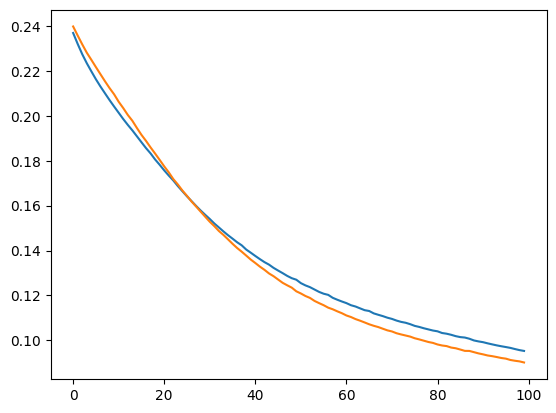

In [103]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(y_encoded.shape[1],activation='sigmoid')
])

model.compile(optimizer='Adam',loss='MeanSquaredError',metrics=['Accuracy','F1Score'])
history=model.fit(x_train,y_train,epochs=100,batch_size=5,validation_split=0.3,verbose=1)
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='validation loss')
plt.show()

In [ ]:
Write your code here